<a href="https://colab.research.google.com/github/jbloewencolon/Analyzing-Bergson/blob/main/Data_Cleaning_and_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install PyPDF2

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from nltk import bigrams

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

In [32]:
import warnings
from PyPDF2 import PdfReader
import os
import pickle

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='PyPDF2')

# Check if a pickled file already exists
pickle_file_path = r'/content/drive/MyDrive/Projects/Archived Projects/Syracuse/2017 - 2018/1 Comps/3  VR Problem Exam/Summaries/Bergson/Bergson_pdf_text_dict.pkl'

if os.path.exists(pickle_file_path):
    with open(pickle_file_path, 'rb') as handle:
        pdf_text_dict = pickle.load(handle)
    print("Loaded pickled dictionary. Exiting script.")
else:
    print("Pickled dictionary not found. Proceeding with PDF processing.")

    # Function to convert a PDF to text
    def pdf_to_text(filepath):
        with open(filepath, 'rb') as f:
            pdf_reader = PdfReader(f)
            text_pages = []
            for page_num in range(len(pdf_reader.pages)):
                text_pages.append(pdf_reader.pages[page_num].extract_text())
        return ''.join(text_pages)

    # Initialize a dictionary to hold each PDF's text
    pdf_text_dict = {}

    # Define the directory path for PDFs
    folder_path = "/content/drive/MyDrive/Projects/Archived Projects/Syracuse/2017 - 2018/1 Comps/3  VR Problem Exam/Summaries/Bergson"

    # List all files in the directory
    pdf_files = [f for f in os.listdir(folder_path) if f.endswith('.pdf')]

    # Loop through each PDF file and extract text
    for pdf_file in pdf_files:
        if pdf_file not in pdf_text_dict:  # Skip if already processed
            full_path = os.path.join(folder_path, pdf_file)
            print(f"Processing {pdf_file}...")
            try:
                pdf_text = pdf_to_text(full_path)
                pdf_text_dict[pdf_file] = pdf_text
            except Exception as e:
                print(f"Failed to process {pdf_file}: {e}")

    # Pickle the dictionary
    with open(pickle_file_path, 'wb') as handle:
        pickle.dump(pdf_text_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

    print("Pickled the dictionary.")

Pickled dictionary not found. Proceeding with PDF processing.
Processing Duration and simultaneity.pdf...
Processing Mind-Energy_ Lectures and Essays.pdf...
Processing Time and free will_ an essay on the immediate data of consciousness.pdf...
Processing An Introduction to Metaphysics (1912).pdf...
Processing Creative Evolution.pdf...
Processing Laughter.pdf...
Processing The Meaning Of War.pdf...
Processing The Creative Mind.pdf...
Processing Matter and Memory.pdf...
Processing Two Sources.pdf...
Processing Dreams.pdf...
Pickled the dictionary.


In [33]:
for key, value in pdf_text_dict.items():
    print(f"---{key}---")
    print(value[:100])  # print the first 100 characters

---Duration and simultaneity.pdf---
BOBBS-MERRILL THELIBRARY OFLIBERAL ARTS
BERGSON
Duration and
Simultaneity
.B413
Duration andSimultan
---Mind-Energy_ Lectures and Essays.pdf---
]?ELHI UNIVERSITY LIBRARY
OJ.Np.S
,. >s Date ofreleoBe foiloai
Ad.Ko.|0B&
This book should bereturne
---Time and free will_ an essay on the immediate data of consciousness.pdf---
MUIRHEAD LIBRARY OF PHILOSOPHY 
As may be seen from the original programme 
printed in Erdmann’s His
---An Introduction to Metaphysics (1912).pdf---
iii Tr ; METAPHYSICS saree ptrenr et smn 
HENRI BERGSON 
The Library | : 
SCHOOL OF THEOLOGY 
_ AT C
---Creative Evolution.pdf---
V)> U3^
m<OU_166582>m
z
._i
OSMANIA UNIVERSITY LIBRARY
CallNO.-/T7$& S%
Accession No.
Author
Thisboo
---Laughter.pdf---
DELHI UNIVERSITY\
LIBRARY]
\
i
-r ^
ClNo‘
Ac.No. Date ofrelease forloan
Thisbook should beretursed o
---The Meaning Of War.pdf---
A free download from http://manybooks.net
The Meaning of the War
The Meaning of the War
The Meaning 
---The Crea

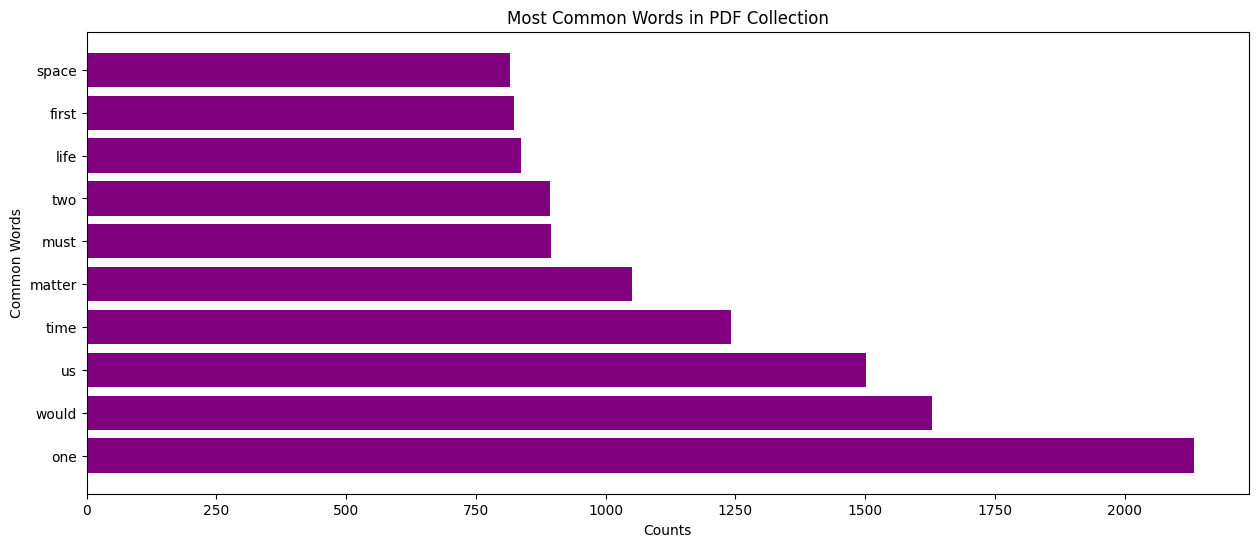

In [34]:
# Convert all the text to lowercase and concatenate it
all_text = ''.join([text.lower() for text in pdf_text_dict.values()])

# Tokenization: Split the text into words
tokens = word_tokenize(all_text)

# Remove Punctuation and Numbers
tokens = [word for word in tokens if word.isalpha()]

# Remove Stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if not word in stop_words]

# Frequency Distribution
freq = Counter(filtered_tokens)

# Visualization
common_words = freq.most_common(10)
words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(15, 6))
plt.barh(words, counts, color='purple')
plt.xlabel('Counts')
plt.ylabel('Common Words')
plt.title('Most Common Words in PDF Collection')
plt.show()


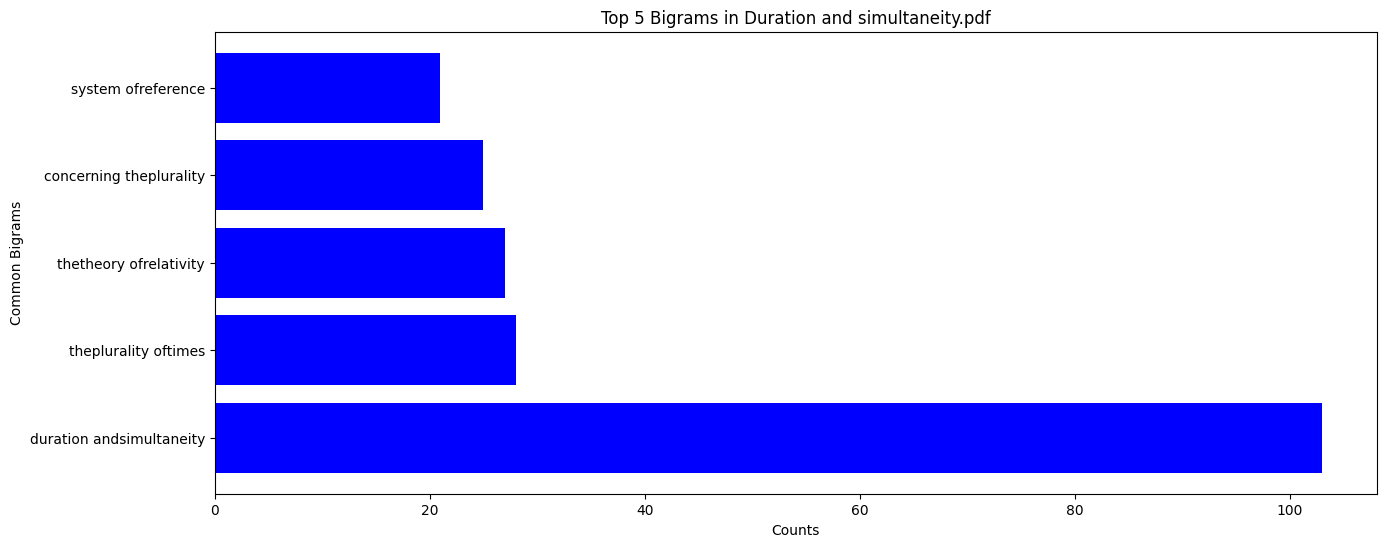

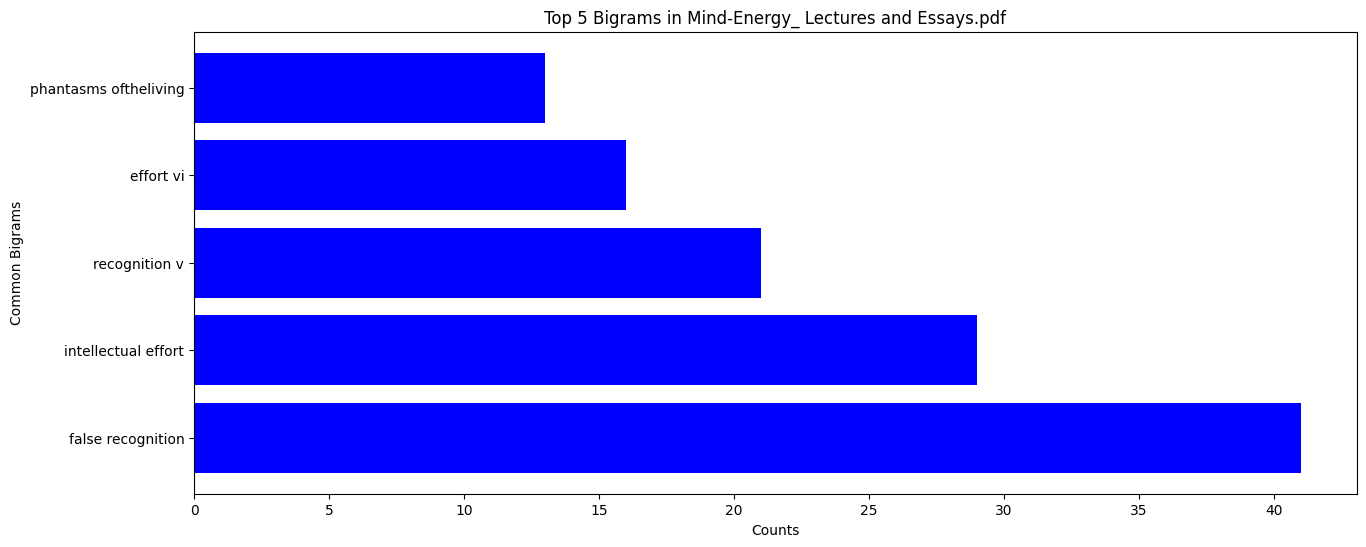

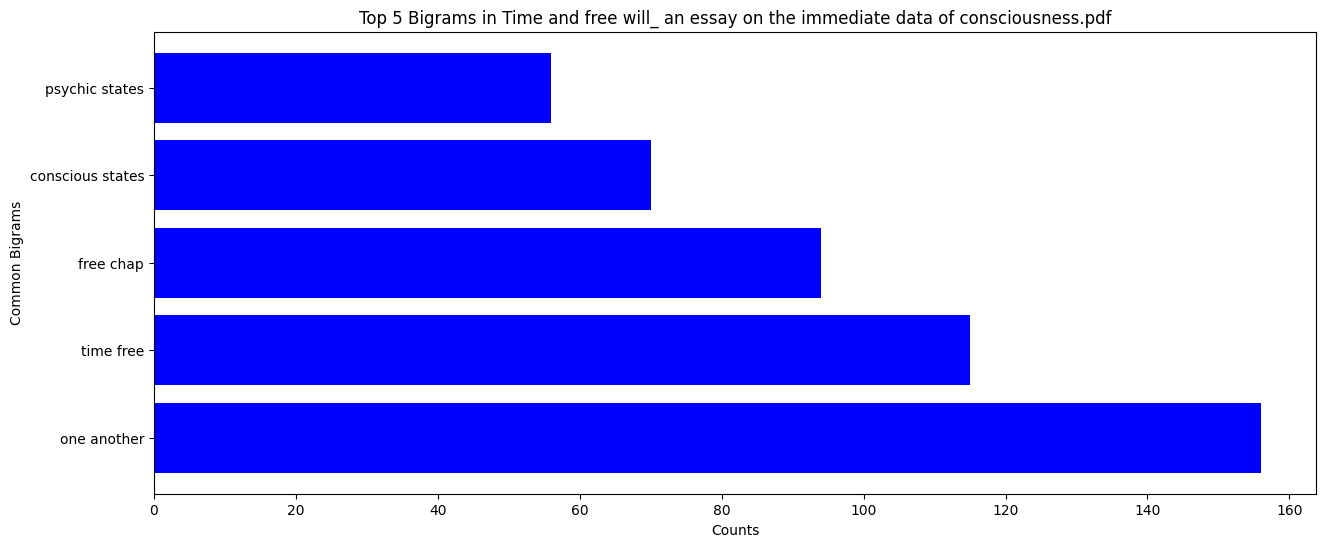

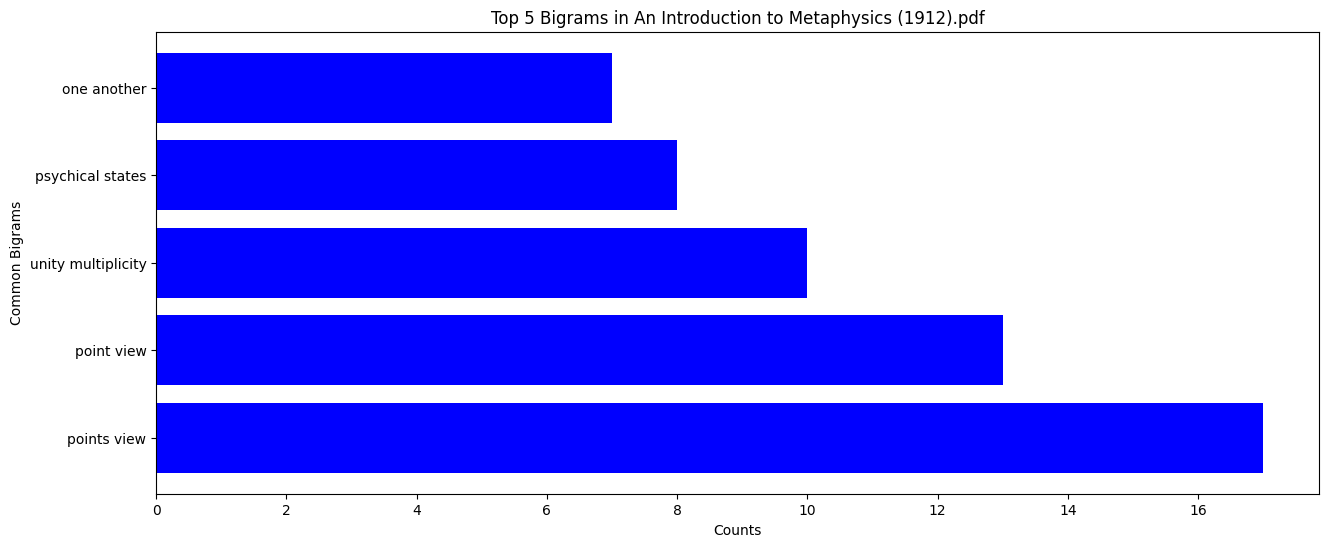

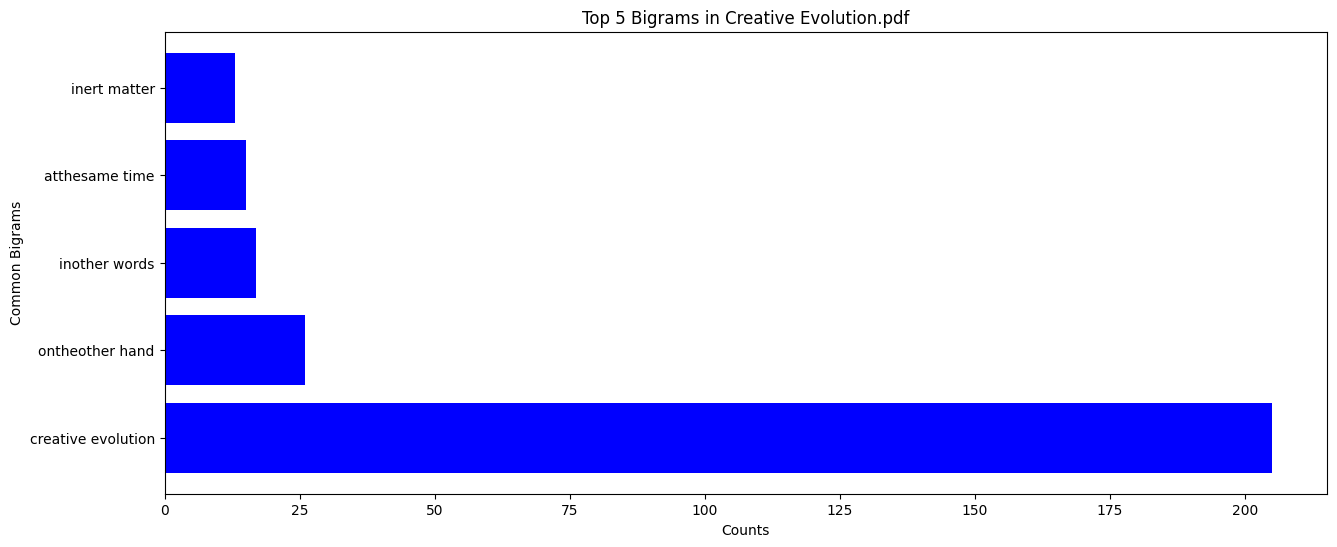

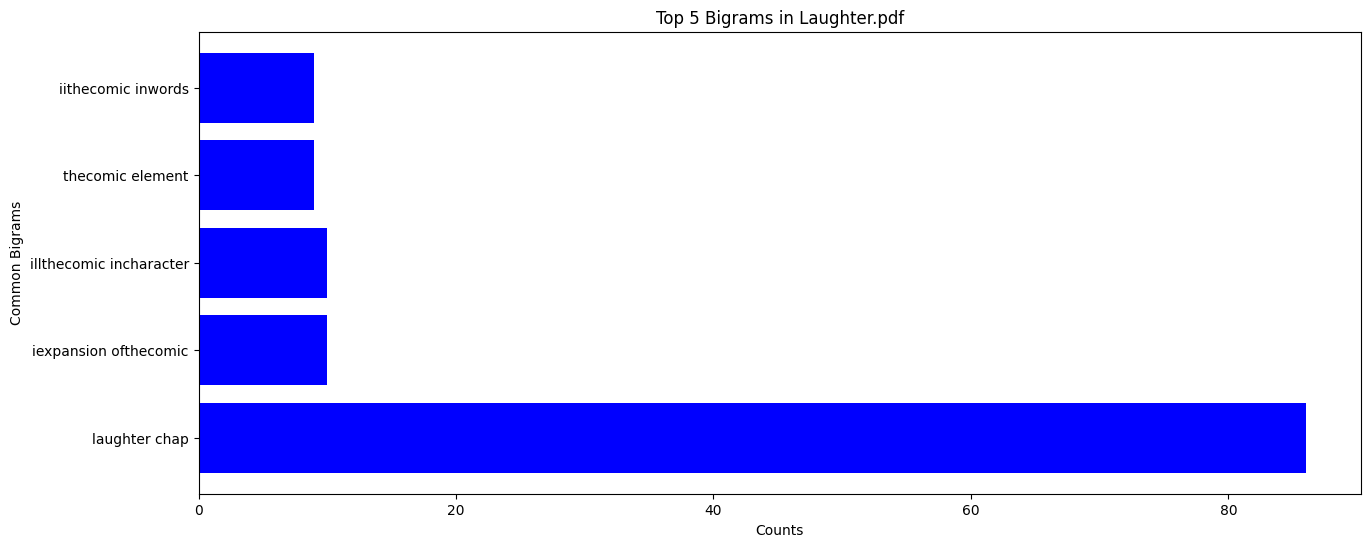

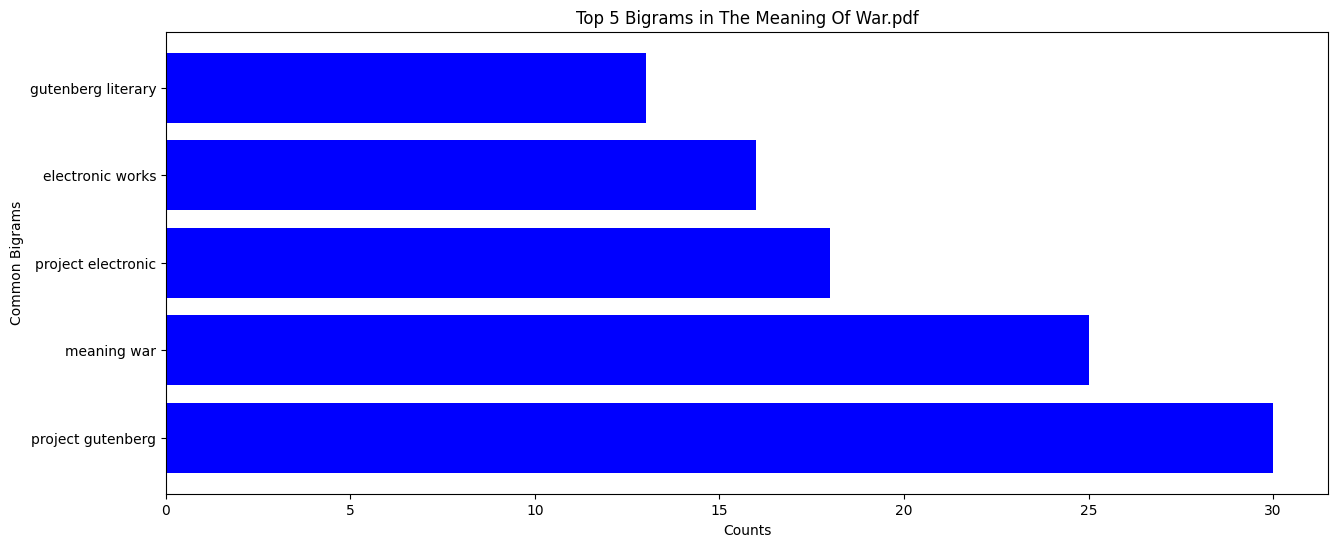

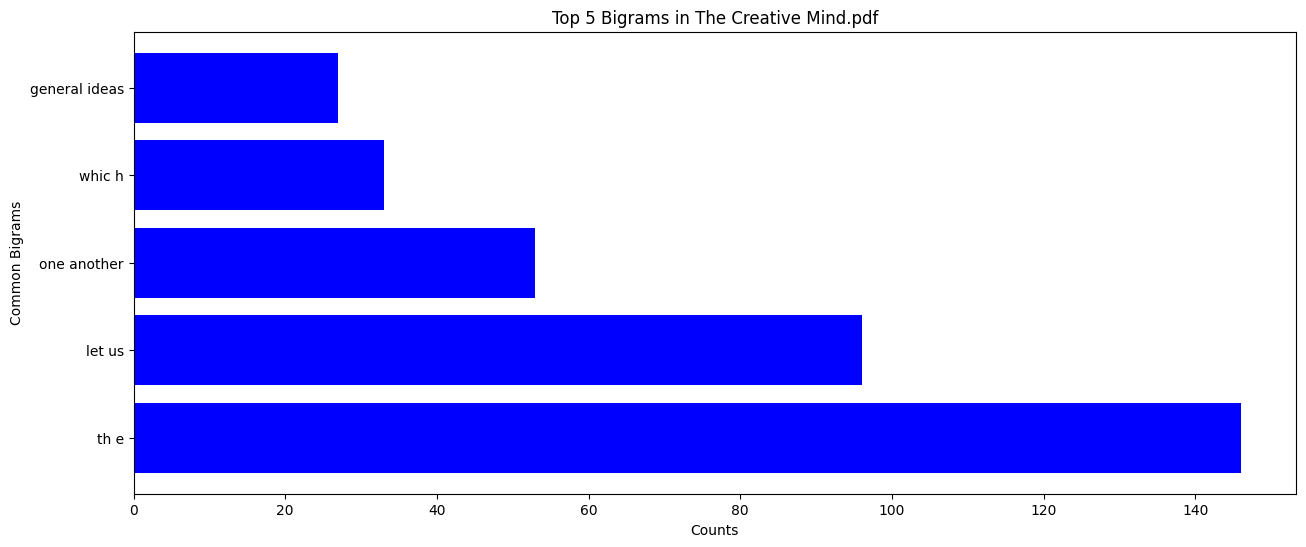

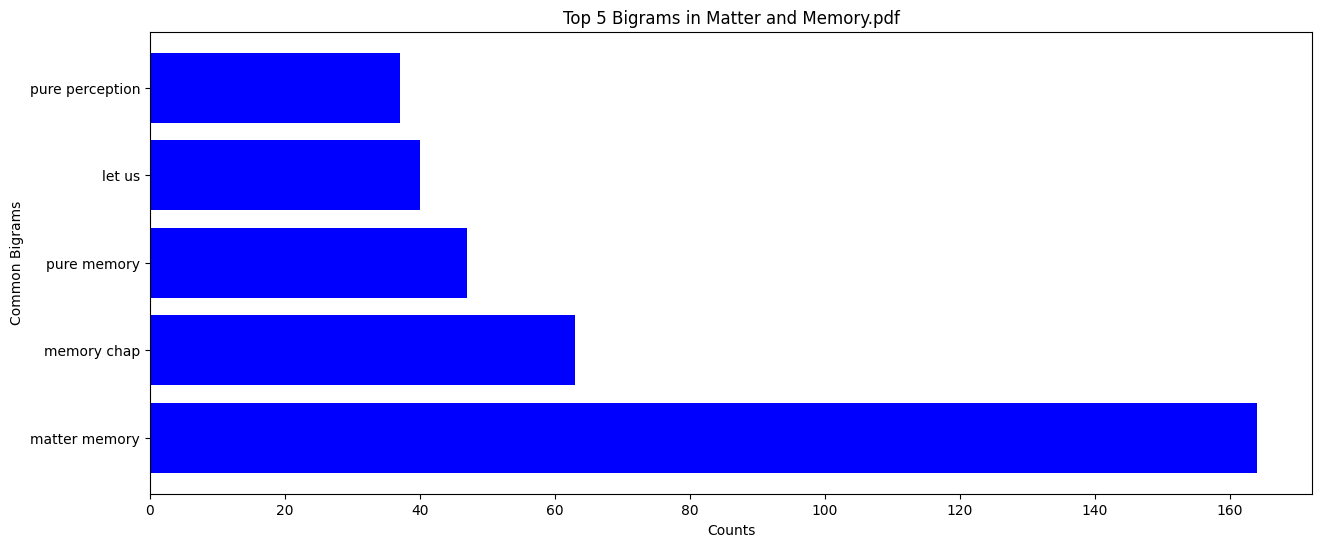

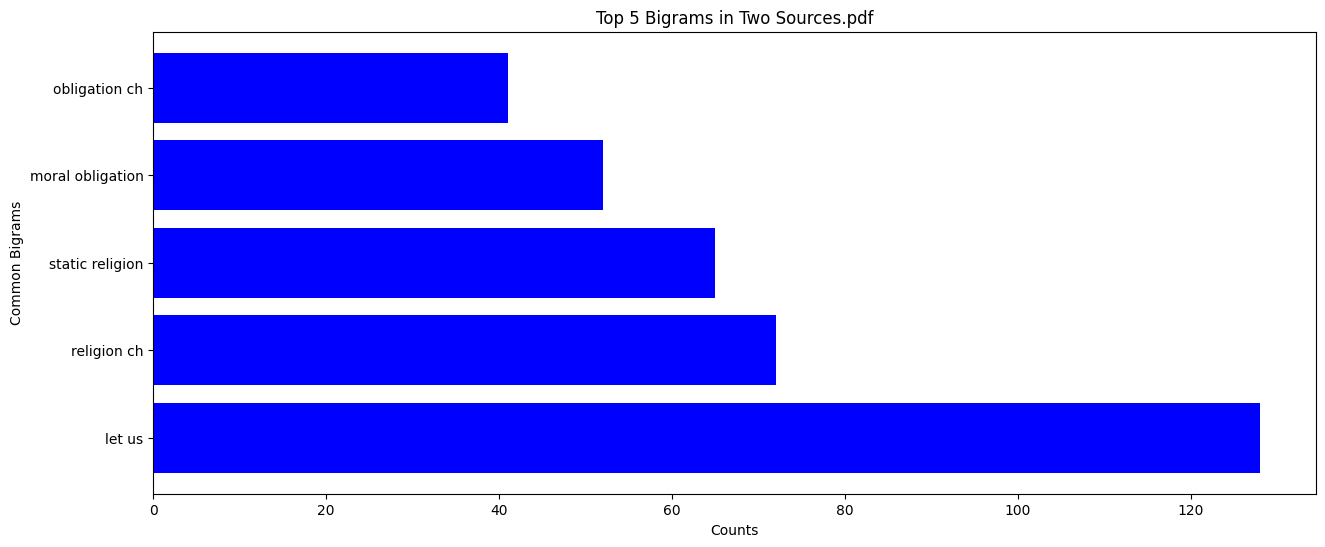

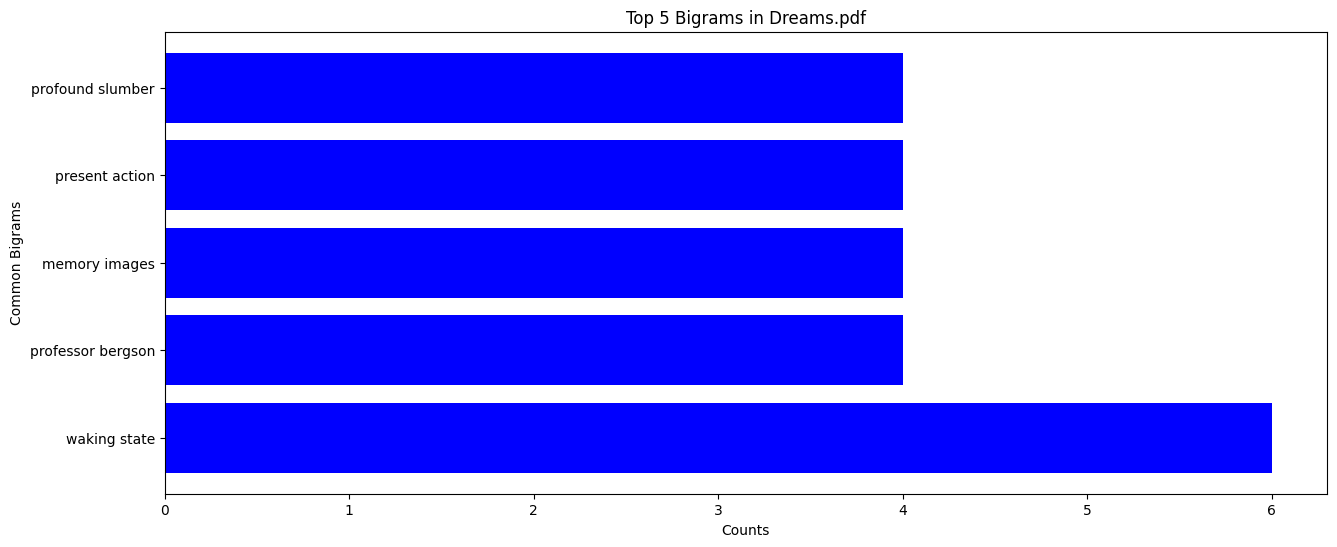

In [35]:
# Initialize a dictionary to hold the most common bigrams for each text
common_bigrams_per_text = {}

# Loop through each text in your dictionary
for pdf_file, text in pdf_text_dict.items():
    # Tokenization: Split the text into words
    tokens = word_tokenize(text.lower())  # Converting to lower case

    # Remove punctuation and numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if not word in stop_words]

    # Generate bigrams
    bigrams_list = list(bigrams(filtered_tokens))

    # Count frequency of bigrams
    bigram_freq = Counter(bigrams_list)

    # Get top 5 bigrams
    common_bigrams = bigram_freq.most_common(5)

    # Add the top 5 bigrams for this text to the dictionary
    common_bigrams_per_text[pdf_file] = common_bigrams

    # Optional: Plot top 5 bigrams for the current text
    plt.figure(figsize=(15, 6))
    bigram_words = [f"{bigram[0][0]} {bigram[0][1]}" for bigram in common_bigrams]
    bigram_counts = [bigram[1] for bigram in common_bigrams]
    plt.barh(bigram_words, bigram_counts, color='blue')
    plt.xlabel('Counts')
    plt.ylabel('Common Bigrams')
    plt.title(f"Top 5 Bigrams in {pdf_file}")
    plt.show()